# Data Sci Eng Methods

## Data Cleaning, Feature Selection, Modeling and Interpretability

### About Dataset
The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. All datasets are at a day-level with pricing and trading values split across .cvs files for each stock along with a metadata file with some macro-information about the stocks itself. The data spans from 1st January, 2000 to 30th April, 2021.

Note: The dataset contains stock data for 50 stocks

### Columns

Date - Trade Data

Symbol - Name of stock

Series - Type of security

Prev Close - Previous data closing price

Open - Opening price for the day

High - Highest price for the day

Low - Lowest price for the day

Last - Last trade price

Closes - Closing price

VWAP - Volume-weighted average price (a ratio of the cumulative share price to the cumulative volume traded over a given time period)

Volume - volume trades for the day

Turnover - The turnover ratio is ratio of sellers to buyers of a stock

Trades - Number of Trades

Deliverable Volume - Amount of deliverable volume

%Deliverble - Percentage of shares that were delivered

Note: All price are in Rupees

### Aim

1. Perform Data Cleaning
2. Perform Feature Selection
3. Modeling (Linear Model, Tree based Model and AutoML Model)
4. Shap Analysis for each model

In [59]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=cd0f0bbb720dff2a41482e660a1f30eaab554db9226d461dfbfcc2509b07537b
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [58]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.7 MB/s eta 0:00:00


In [57]:
pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=57018c2b9a24fce724a7b83564ebb6c53bfa435189392b21c918eeef8c7b56d6
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [62]:
# import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import shap
import h2o
from h2o.automl import H2OAutoML
from tpot import TPOTRegressor

In [2]:
# Read Data
url = "https://raw.githubusercontent.com/ChaudharyAnshul/INFO6105_Assignments/main/Nifty50_Data/NIFTY50_all.csv"
data = pd.read_csv(url)

# Data Cleaning

In [3]:
# Print top 5 values
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [4]:
#Print all the Unique stock names
symbol = data["Symbol"].unique()
print(symbol)
print("Unique stock values: ", len(symbol))

['MUNDRAPORT' 'ADANIPORTS' 'ASIANPAINT' 'UTIBANK' 'AXISBANK' 'BAJAJ-AUTO'
 'BAJAJFINSV' 'BAJAUTOFIN' 'BAJFINANCE' 'BHARTI' 'BHARTIARTL' 'BPCL'
 'BRITANNIA' 'CIPLA' 'COALINDIA' 'DRREDDY' 'EICHERMOT' 'GAIL' 'GRASIM'
 'HCLTECH' 'HDFC' 'HDFCBANK' 'HEROHONDA' 'HEROMOTOCO' 'HINDALC0'
 'HINDALCO' 'HINDLEVER' 'HINDUNILVR' 'ICICIBANK' 'INDUSINDBK' 'INFOSYSTCH'
 'INFY' 'IOC' 'ITC' 'JSWSTL' 'JSWSTEEL' 'KOTAKMAH' 'KOTAKBANK' 'LT' 'M&M'
 'MARUTI' 'NESTLEIND' 'NTPC' 'ONGC' 'POWERGRID' 'RELIANCE' 'SBIN'
 'SHREECEM' 'SUNPHARMA' 'TELCO' 'TATAMOTORS' 'TISCO' 'TATASTEEL' 'TCS'
 'TECHM' 'TITAN' 'ULTRACEMCO' 'UNIPHOS' 'UPL' 'SESAGOA' 'SSLT' 'VEDL'
 'WIPRO' 'ZEETELE' 'ZEEL']
Unique stock values:  65


Since the Dataset has 50 stock values there should only be 50 unique values.

Some of the stock are renamed over time.

* MUNDRAPORT -> ADANIPORTS

* BAJAUTOFIN -> BAJFINANCE

* BHARTI -> BHARTIARTL

* HINDLEVER -> HINDUNILVR

* JSWSTL -> JSWSTEEL

* KOTAKMAH -> KOTAKBANK

* TELCO -> TATAMOTORS

* TISCO -> TATASTEEL

* UNIPHOS -> UPL

* SESAGOA -> SSLT -> VEDL

* HINDALC0 -> HINDALCO

In [5]:
#replacing the values
replace = [
    ["MUNDRAPORT","ADANIPORTS"],
    ["BAJAUTOFIN","BAJFINANCE"],
    ["BHARTI","BHARTIARTL"],
    ["HINDLEVER","HINDUNILVR"],
    ["JSWSTL","JSWSTEEL"],
    ["KOTAKMAH","KOTAKBANK"],
    ["TELCO","TATAMOTORS"],
    ["TISCO","TATASTEEL"],
    ["SESAGOA","VEDL"],
    ["SSLT","VEDL"],
    ["HINDALC0","HINDALCO"],
    ["UNIPHOS","UPL"],
]
for i in replace:
    data.loc[ data["Symbol"] == i[0], "Symbol"] = i[1]

In [7]:
data["Symbol"].unique()

array(['ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK', 'BAJAJ-AUTO',
       'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA',
       'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM',
       'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROHONDA', 'HEROMOTOCO',
       'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH',
       'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M',
       'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE',
       'SBIN', 'SHREECEM', 'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS',
       'TECHM', 'TITAN', 'ULTRACEMCO', 'UPL', 'VEDL', 'WIPRO', 'ZEETELE',
       'ZEEL'], dtype=object)

In [10]:
# Checking the Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

In [9]:
# finding null values if any
data.isnull().sum()

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64

There are NaN values present in the data, the dataset captured 0 as Null/NaN hence filling the null values with 0 for Trades, Deliverable Volume and %Deliverble.

Explained below:

<b>Number of Trades</b> can be 0 - It's very simple to understand that if the deal which is comprised of sellers and buyers is zero, the buyers and sellers for that trade aren't buying or selling.
Volumes are always positive if not zero and can be represented as the number of trades per day for a commodity, stock, options, or future.

<b>Deliverable Volume</b> can be 0 - In the context of stock trading and financial markets, "deliverable volume" typically refers to the number of shares of a particular stock that are traded and actually delivered to the buyer or seller during a trading session. It represents the number of shares that have changed ownership. There are some situations where deliverable volume might be very low, or zero for certain stocks.

<b>%Deliverble</b> can be 0 - It is possible for the "% Deliverable" (percentage of shares that were delivered) of a stock to be zero or close to zero on a particular trading day. "% Deliverable" is a measure that indicates the proportion of shares traded for a particular stock on a given day that were actually delivered to the buyers' accounts.

In [11]:
# replace null values with 0 based on the above explanation
data["Trades"].fillna(0, inplace = True)
data["Deliverable Volume"].fillna(0, inplace = True)
data["%Deliverble"].fillna(0, inplace = True)

In [12]:
# checking if there is still any null values
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

There are no missing data present in the dataset, since in the above code the null values are already handled.

### Removeing 1% 5% and 10% of the data randomly from the dataset and testing Data missing Data filling methods


In [49]:
original_data = data.loc[ data["Symbol"] == "ADANIPORTS"]["Open"] # original data
# to remove data from row
def RemoveData(per):
    remove_per = per
    num_rows = int(len(original_data) * remove_per) # number of row to delete
    rows_delete = np.random.choice(original_data.index, num_rows, replace=False) # choose randomly
    data_less = original_data.drop(rows_delete)  # drop random rows
    print("Number of rows to populate ", per*100, "% :",num_rows)
    return data_less, num_rows

In [50]:
# to add data to row and calculate error
def FillDataAndCalculateError(data, value, num_rows, per):
    data_less_df = data.to_frame()  # convert to frame
    new_data = {
        'Open': [value] * num_rows,
    }
    new_df = pd.DataFrame(new_data)
    new_df = pd.concat([data_less_df, new_df]) # merge frame


    # calculating Error Bias and Variance
    residuals = original_data - new_df["Open"]
    percent_errors = np.abs(residuals / original_data) * 100
    bias = np.mean(percent_errors)
    variance = np.std(percent_errors)
    print("Error for %", per, " (Bias): ", bias)
    print("Error for %", per, " (Variance): ", variance)

In [54]:
# removing 1% data
remove_per = 0.01
data_less_1, num_rows_1 = RemoveData(remove_per)

# removing 5% data
remove_per = 0.05
data_less_5, num_rows_5 = RemoveData(remove_per)

# removing 10% data
remove_per = 0.1
data_less_10, num_rows_10 = RemoveData(remove_per)

Number of rows to populate  1.0 % : 33
Number of rows to populate  5.0 % : 166
Number of rows to populate  10.0 % : 332


In [55]:
#Added back mean of all the values
FillDataAndCalculateError(data_less_1, float(data_less_1.to_frame().mean()), num_rows_1, 1)
FillDataAndCalculateError(data_less_5, float(data_less_5.to_frame().mean()), num_rows_5, 5)
FillDataAndCalculateError(data_less_10, float(data_less_10.to_frame().mean()), num_rows_10, 10)

Error for % 1  (Bias):  0.6802984024304131
Error for % 1  (Variance):  6.802950666550119
Error for % 5  (Bias):  2.5802523973547618
Error for % 5  (Variance):  11.617269902308502
Error for % 10  (Bias):  3.4308086222536898
Error for % 10  (Variance):  12.354689997602033


In [56]:
#Added back median of all the values
FillDataAndCalculateError(data_less_1, float(data_less_1.to_frame().median()), num_rows_1, 1)
FillDataAndCalculateError(data_less_5, float(data_less_5.to_frame().median()), num_rows_5, 5)
FillDataAndCalculateError(data_less_10, float(data_less_10.to_frame().median()), num_rows_10, 10)

Error for % 1  (Bias):  0.6979086209891305
Error for % 1  (Variance):  6.977269039406113
Error for % 5  (Bias):  2.7092762488757227
Error for % 5  (Variance):  12.12703036976581
Error for % 10  (Bias):  3.6006897059787137
Error for % 10  (Variance):  12.916776407812218


Observation:

There is low Bias and low variance when the missing value is filled by mean, median but as the missing values increases the bias and variance also increases.

# Data Visualization and Feature Selection

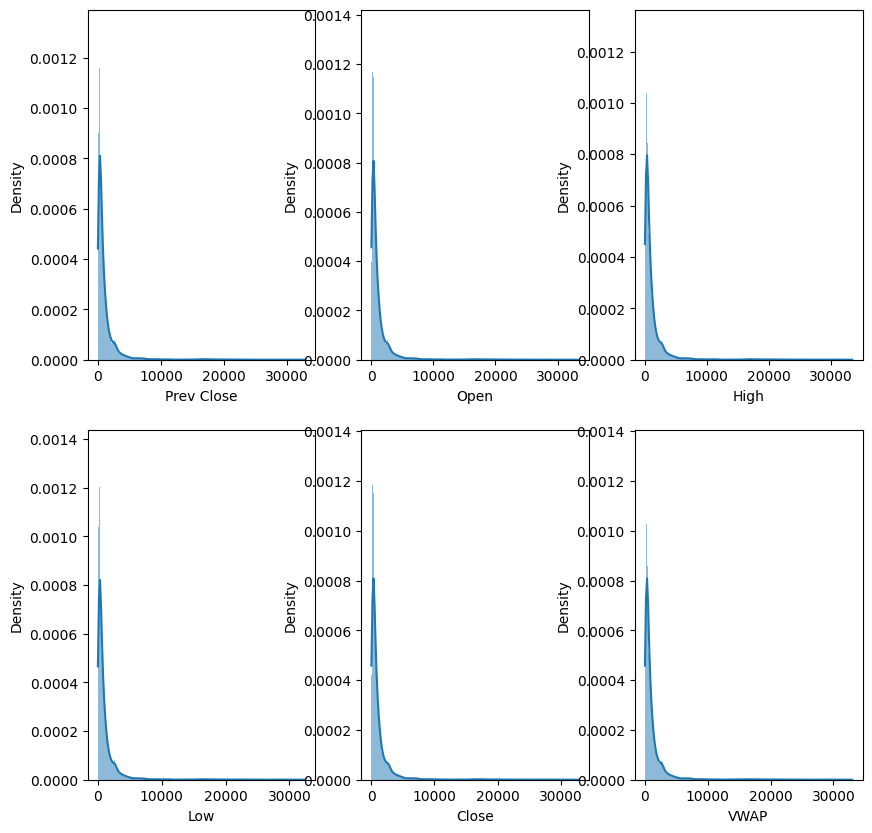

In [13]:
# density distrubution for entire data set
plt.subplot(231)
sns.histplot(data['Prev Close'], kde=True, stat="density", linewidth=0)

plt.subplot(232)
sns.histplot(data['Open'], kde=True, stat="density", linewidth=0)

plt.subplot(233)
sns.histplot(data['High'], kde=True, stat="density", linewidth=0)

plt.subplot(234)
sns.histplot(data['Low'], kde=True, stat="density", linewidth=0)

plt.subplot(235)
sns.histplot(data['Close'], kde=True, stat="density", linewidth=0)

plt.subplot(236)
sns.histplot(data['VWAP'], kde=True, stat="density", linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)

Observation:

* All the distributions show similar distribution properties
* All the distributions are right skewed, that means they are positively skewed

Need to select individual stocks and verify the skewness of data, since different socks trade in different price range.

In [16]:
# Selecting Single Stock to carry forward the analysis

# ADANIPORTS
data_ap = data.loc[ data["Symbol"] == "ADANIPORTS"]

In [17]:
# Dropping Columns since they are not important
data_ap = data_ap.drop(labels=["Series","Symbol"], axis=1)

<ipython-input-25-f5909af26e35>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_ap.corr()


<Axes: >

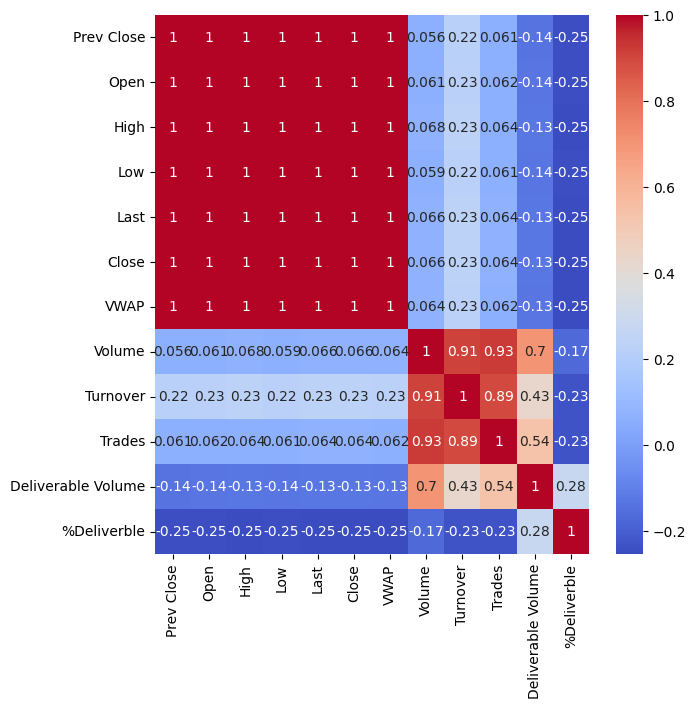

In [25]:
# correlation matrix for Asianpaints
corr = data_ap.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, cmap="coolwarm")

Observations:

Based on the above matrix "Prev Close", "Open", "High", "Low", Last", "VWAP" are strongly correlated with the target variable. This indicates a significant relationship with the target.


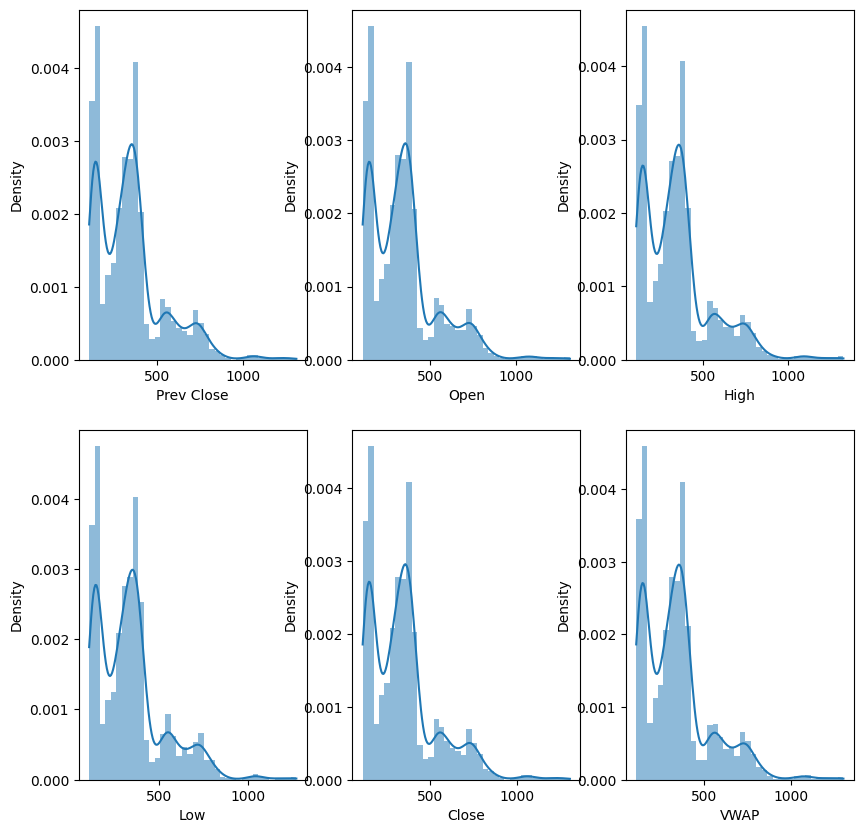

In [18]:
# density distrubution for ADANIPORTS
plt.subplot(231)
sns.histplot(data_ap['Prev Close'], kde=True, stat="density", linewidth=0)

plt.subplot(232)
sns.histplot(data_ap['Open'], kde=True, stat="density", linewidth=0)

plt.subplot(233)
sns.histplot(data_ap['High'], kde=True, stat="density", linewidth=0)

plt.subplot(234)
sns.histplot(data_ap['Low'], kde=True, stat="density", linewidth=0)

plt.subplot(235)
sns.histplot(data_ap['Close'], kde=True, stat="density", linewidth=0)

plt.subplot(236)
sns.histplot(data_ap['VWAP'], kde=True, stat="density", linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)

Observation:

* All the distributions show similar distribution properties
* All the distributions are right skewed showing positive skewness

<Axes: >

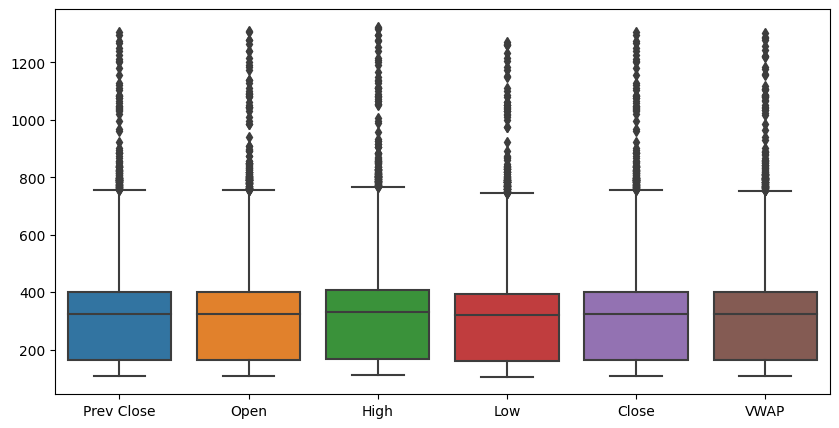

In [23]:
# Checking the Ranges of the predictor variables and dependent variables for ADANIPORTS
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_ap[["Prev Close", "Open", "High", "Low", "Close", "VWAP"]])

<h4>Inference:</h4>

Looking at the box plot above it can be inferred that the values are in the same range and no data transformation is required.


In [29]:
# spliting the dependent and independent variables
X_ap,y_ap = data_ap.drop(labels=["Date","Close"], axis=1), data_ap["Close"]

In [31]:
# selectKBest for Feature Selection
# trying all possible values of K to get an idea of the most impotant Features
for i in range(2,12):
    selector = SelectKBest(score_func=f_classif, k=i)

    selector.fit_transform(X_ap, y_ap)
    selected_features_mask_1 = selector.get_support()

    print("for AsianPaints K = ",i)
    print("selected values: ", [v for v, b in zip(X_ap.columns, selected_features_mask_1) if b == True ])

for AsianPaints K =  2
selected values:  ['Last', 'VWAP']
for AsianPaints K =  3
selected values:  ['High', 'Last', 'VWAP']
for AsianPaints K =  4
selected values:  ['High', 'Low', 'Last', 'VWAP']
for AsianPaints K =  5
selected values:  ['Open', 'High', 'Low', 'Last', 'VWAP']
for AsianPaints K =  6
selected values:  ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP']
for AsianPaints K =  7
selected values:  ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Turnover']
for AsianPaints K =  8
selected values:  ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Turnover', 'Trades']
for AsianPaints K =  9
selected values:  ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Volume', 'Turnover', 'Trades']
for AsianPaints K =  10
selected values:  ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume']
for AsianPaints K =  11
selected values:  ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Volume', 'Turnover', 'Trades'

This shows based on the k values, all independent variables that affect the dependent variables

* Feature Importance Progression: As K increases, more features are selected, indicating a wider range of metrics considered relevant for understanding Asian Paints' stock behavior.

* Consistent Core Indicators: Certain features ('Last', 'High', 'Low', 'Open', 'VWAP') consistently appear across different K values, highlighting their fundamental role in stock analysis. These metrics reflect different price points and averages.

In [32]:
#f_regression method to identify all important variables
f_scores_ap, p_values_ap = f_regression(X_ap, y_ap)

print("f-scores and p-values for Asianpaints")
print("F-scores:")
print(list(zip(X_ap.columns, f_scores_ap)))
print("p-values:")
print(list(zip(X_ap.columns, p_values_ap)))

f-scores and p-values for Asianpaints
F-scores:
[('Prev Close', 342856.4613553928), ('Open', 801142.276698572), ('High', 1760123.4995902863), ('Low', 1511609.106108431), ('Last', 42835031.1203225), ('VWAP', 5219150.108193926), ('Volume', 14.730959617742199), ('Turnover', 187.59463309290686), ('Trades', 13.83840124505147), ('Deliverable Volume', 58.39017430115698), ('%Deliverble', 228.134666312034)]
p-values:
[('Prev Close', 0.0), ('Open', 0.0), ('High', 0.0), ('Low', 0.0), ('Last', 0.0), ('VWAP', 0.0), ('Volume', 0.00012630330454410456), ('Turnover', 1.4078916875885543e-41), ('Trades', 0.00020251950272308123), ('Deliverable Volume', 2.7946408907962756e-14), ('%Deliverble', 6.674554226087871e-50)]


Observations:

Highly Significant Features - Features such as 'Prev Close', 'Open', 'High', 'Low', 'Last', and 'VWAP' have exceptionally high F-scores and extremely low p-values (approaching 0). This indicates that these features are highly significant in explaining the variance or predicting outcomes in the stock data. They are crucial in understanding Asian Paints' stock behavior.

**Feature Selection**:

Based on the 3 methods -

1. heatmap: there are 6 independent variables that are more useful in prediction "Prev Close", "Open", "High", "Low", Last", "VWAP".

2. SelectKBest: it can be observed that as we keep increasing the K value the variables based on importance are increased with K. Features ('Last', 'High', 'Low', 'Open', 'VWAP') consistently appear across different K values

3. f_regression: based on the p-values of the independent variables it can be observed that 6 features have p-value as 0, ('Prev Close', 0.0), ('Open', 0.0), ('High', 0.0), ('Low', 0.0), ('Last', 0.0), ('VWAP', 0.0)

Important Features -
* "Prev Close"
* "Open"
* "High"
* "Low"
* "Last"
* "VWAP"

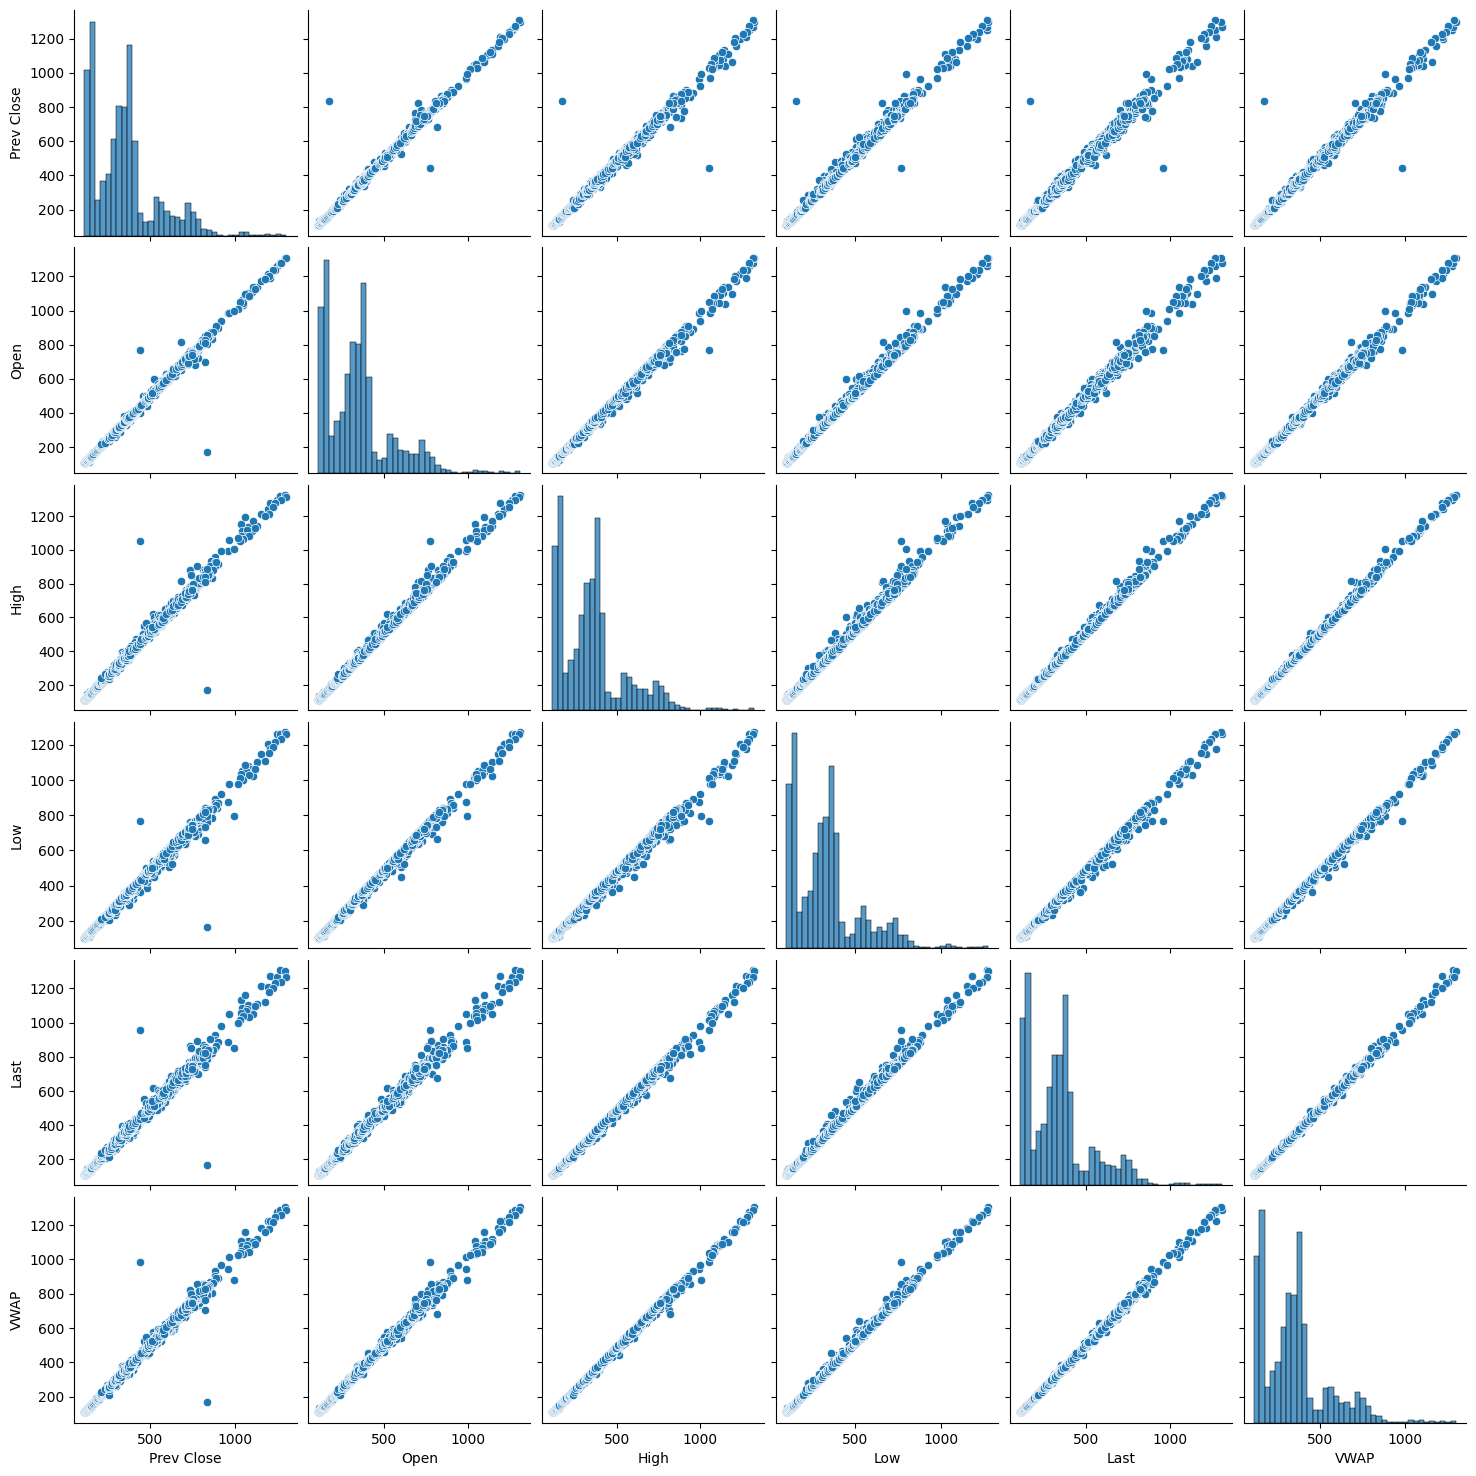

In [35]:
# Pair plot to find relation between independent variables
sns.pairplot(X_ap[["Prev Close", "Open", "High", "Low", "Last", "VWAP"]])
plt.show()

Observation:

From the plot above it can be observed that "Prev Close", "Open", "High", "Low", "Last", "VWAP" are highly correlated to eachother

From the heatmap and pair plot above we can observe that the predictor variables are Multicollinearity.

Predictor: "Prev Close", "Open", "High", "Low", Last", "VWAP".

In [36]:
# split the data into training and testing for Asianpaints
X_train_ap, X_test_ap, y_train_ap, y_test_ap = train_test_split(X_ap[["Prev Close", "Open", "High", "Low", "Last", "VWAP"]], y_ap, test_size=0.2, random_state=42)

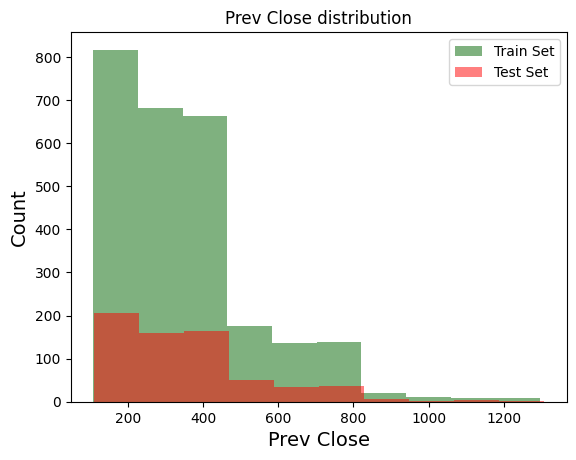

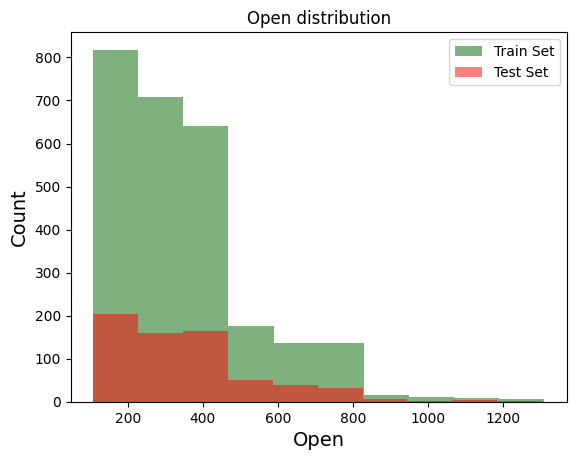

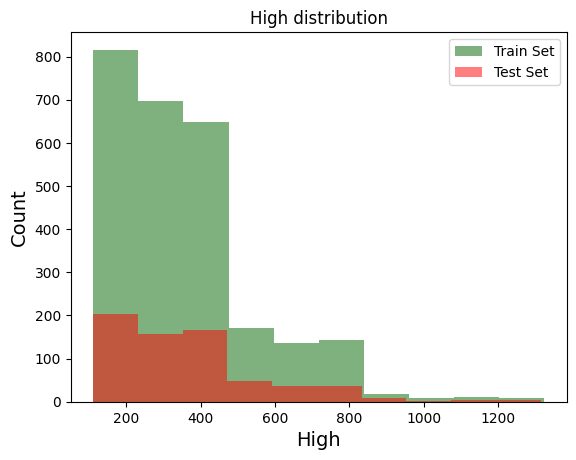

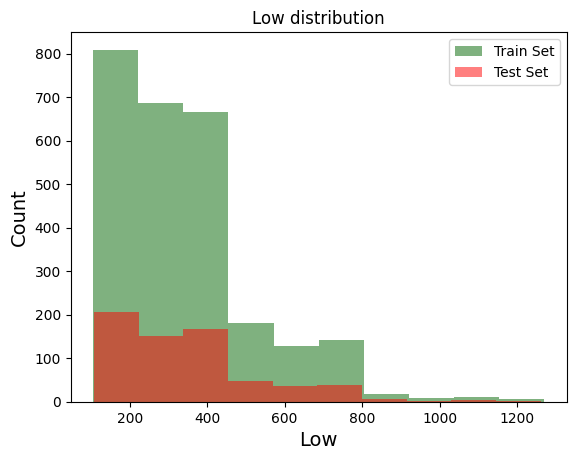

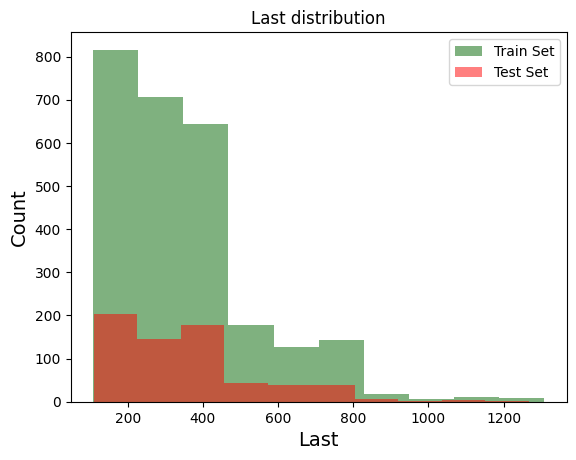

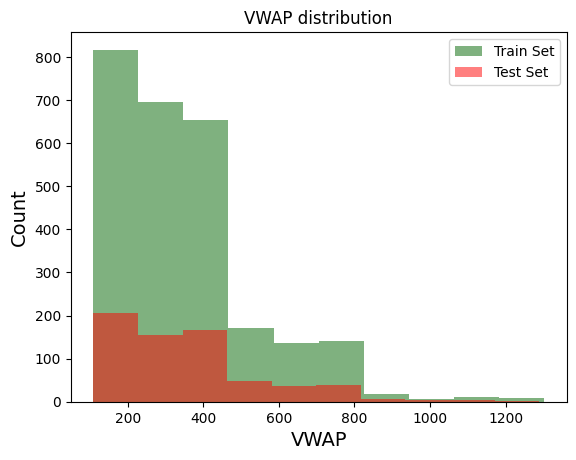

In [40]:
#Plotting the data to see the histogram for Asianpaints for Test and Train data
for c in X_test_ap.columns:
    plt.hist(X_train_ap[c], bins=10, alpha=0.5, label="Train Set", color="darkgreen")
    plt.hist(X_test_ap[c], bins=10, alpha=0.5, label="Test Set", color ="red")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(c))
    plt.show()

Observations:

* By looking at the split of data it looks like data is properly distributed in the ratio of 80%:20% for train and test respectively
* it looks like as we move towards the right on x-axis the split of train:test decreases.

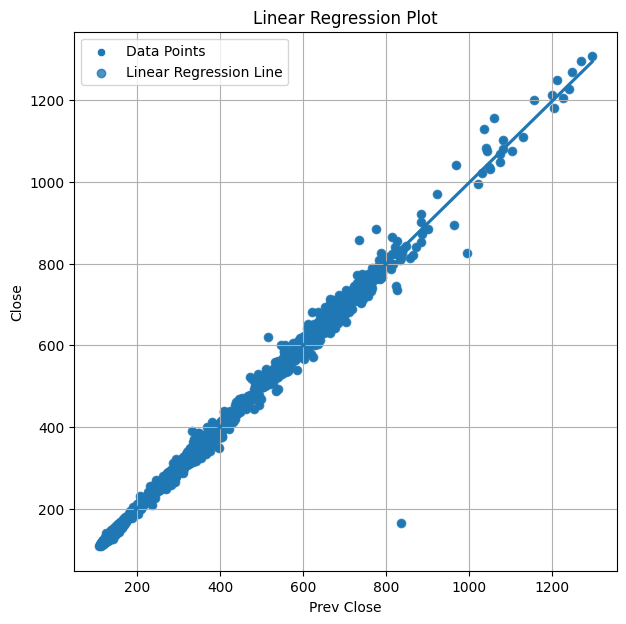

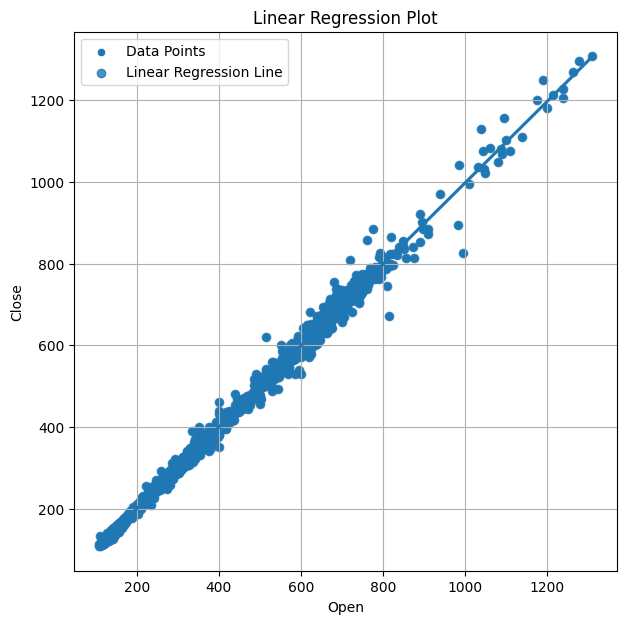

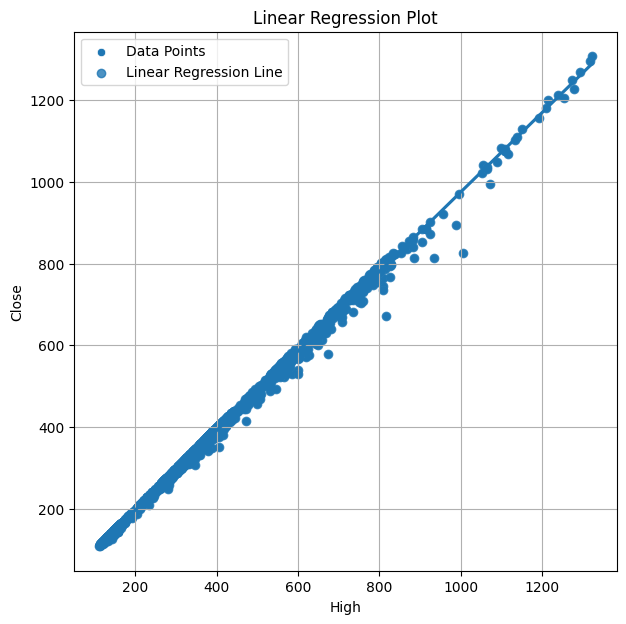

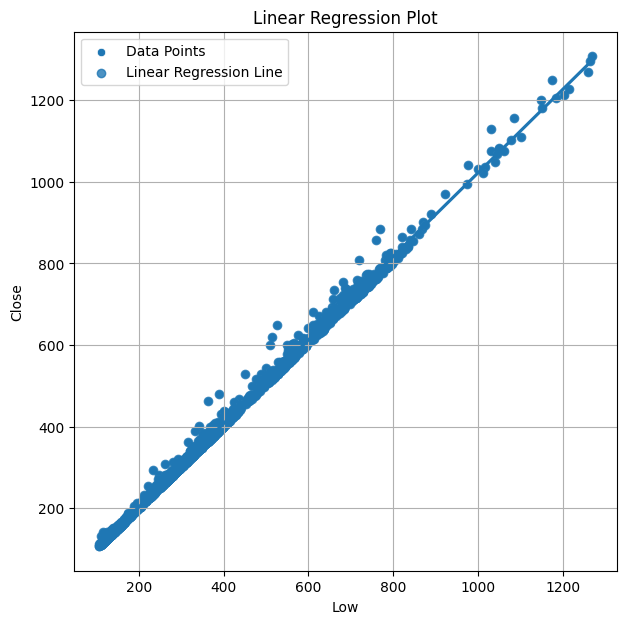

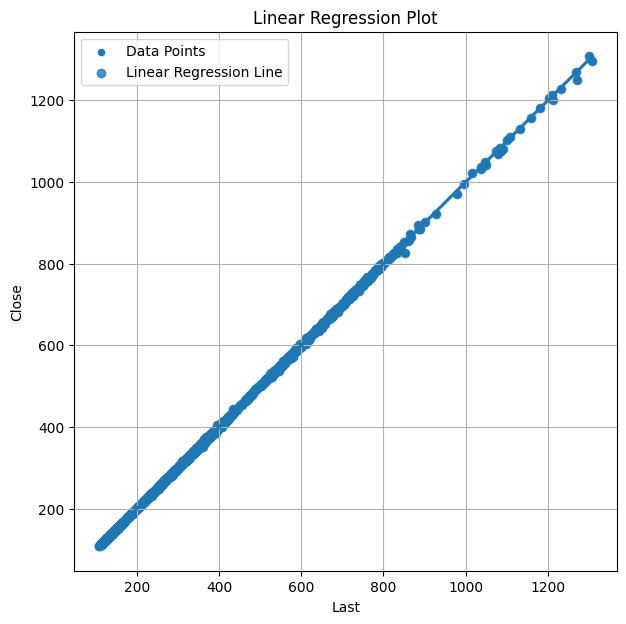

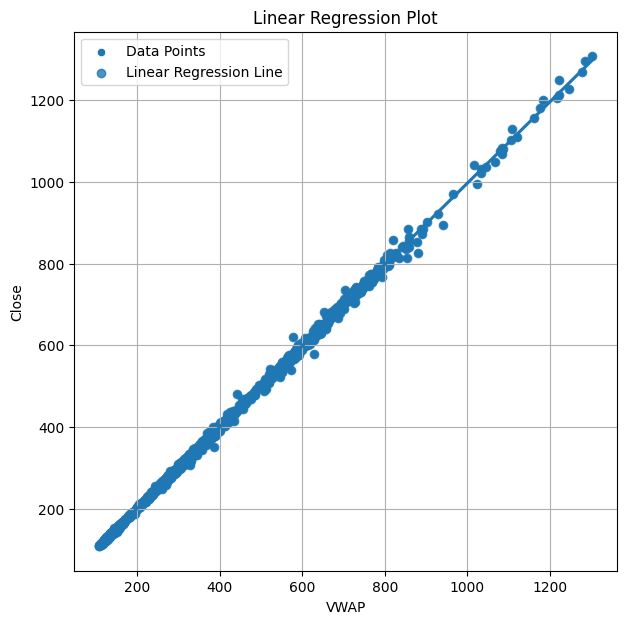

In [43]:
# Create a scatter plot with the data points for Asianpaints
for i in X_train_ap:
    plt.figure(figsize=(7, 7))
    sns.scatterplot(x=X_train_ap[i], y=y_train_ap, label='Data Points')

    # Fit a linear regression line to the data
    sns.regplot(x=X_train_ap[i], y=y_train_ap, ci=None, label='Linear Regression Line')
    plt.xlabel(i)
    plt.ylabel('Close')
    plt.title('Linear Regression Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

Observation:

It can be observed that the 6 features we selected from feature selection show a linear relationship with the target variable

In [60]:
# renaming variables
X, y = X_ap, y_ap
X_train, X_test, y_train, y_test = X_train_ap, X_test_ap, y_train_ap, y_test_ap

In [68]:
# calculate the metrics of model
def evaluate_metric(y_true, y_pred):
    r_squared = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print("R-squared (R2 Score):", r_squared)
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)

# Model Training

### Linear Model

In [63]:
# Add a constant term to the predictor variable for the intercept
preprocessed_X_train = sm.add_constant(X_train)

# Fit the linear regression model
model_reg = sm.OLS(y_train, preprocessed_X_train).fit()

In [64]:
# R-squared and Adjusted R-squared on model
print("R-squared:", model_reg.rsquared)
print("Adjusted R-squared:", model_reg.rsquared_adj)

R-squared: 0.9999455419297076
Adjusted R-squared: 0.9999454186284165


In [65]:
# F-statistic and p-value on model
print("F-statistic:", model_reg.fvalue)
print("p-value:", model_reg.f_pvalue)

F-statistic: 8109773.482266176
p-value: 0.0


Observations:

* The R-squared and Adjusted R-squared close to  1.0 signifies an almost perfect fit of the model to the data, explaining all the variability in the 'Close' values.
* A higher F-statistic with a low associated p-value suggests that at least one predictor variable has a significant effect on the dependent variable.

In [66]:
# Interpret regression coefficients
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.110e+06
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:53:23   Log-Likelihood:                -4691.3
No. Observations:                2657   AIC:                             9397.
Df Residuals:                    2650   BIC:                             9438.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2210      0.057      3.872      0.000       0.109       0.333
Prev Close    -0.0004      0.002     -0.235      0.814      -0.004       0.003
Open          -0.0294      0.005     -6.093      0.000      -0.039      -0.020
High          -0.0494      0.007     -7.170      0.000      -0.063      -0.036
Low            0.0168      0.006      2.793      0.005       0.005       0.029
Last           0.8380      0.006    144.755      0.000       0.827       0.849
VWAP           0.2247      0.011     20.968      0.000       0.204       0.246
==============================================================================
Omnibus:                     1259.571   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112743.474
Skew:                          -1.323   Prob(JB):                         0.00
Kurtosis:                      34.802   Cond. No.                     2.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Inference:

* All predictor variables ('Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP') appear to have statistical significance (p-value < 0.05), except 'Prev Close' (p-value > 0.05)
* The "Last" Variable has the most significant impact on the dependent variable. 'Last' has a coefficient of 0.8380, suggesting that a one-unit increase in the 'Last' variable corresponds to an increase of approximately 0.8380 units in the 'Close' variable

In [67]:
# Evaluate Linear Regression on test data
preprocessed_X_test = sm.add_constant(X_test)
y_pred_lr = model_reg.predict(preprocessed_X_test)

In [69]:
# evaluate model
evaluate_metric(y_test, y_pred_lr)

R-squared (R2 Score): 0.999946398106875
Mean Squared Error (MSE): 2.1054504508968215
Mean Absolute Error (MAE): 0.8752685392241909


Observations:

* The extremely high R-squared value close to 1 indicates an good fit of the regression model to the data, explaining almost all of the variance in the dependent variable.
* Low MSE and low MAE values indicate that, on average, the model's predictions are very close to the actual values, suggesting high accuracy in predicting the dependent variable.

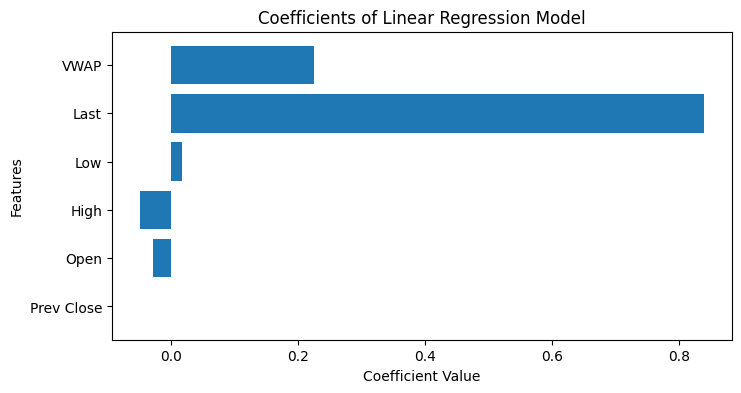

In [70]:
# Visualize coefficients
coef_values = model_reg.params[1:]  # Exclude intercept
coef_names = X_train.columns.tolist()  # Feature names
plt.figure(figsize=(8, 4))
plt.barh(coef_names, coef_values)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficients of Linear Regression Model')
plt.show()

As we saw earlier in the summary that "Last" has most impact on the dependent variable and is it confirmed from the graph above.  

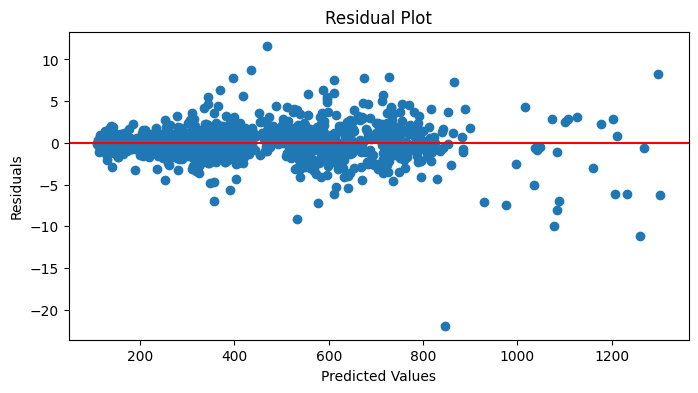

In [71]:
# Residual analysis
residuals = model_reg.resid
plt.figure(figsize=(8, 4))
plt.scatter(model_reg.predict(), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Observations:

Residuals centered around zero indicating that on average the model neither consistently overestimates nor underestimates the observed values. There are a few outliers.

### Random Forest model


In [72]:
# Random Forest model
model_tree  = RandomForestRegressor(n_estimators=20, random_state=42)

In [73]:
# Fit the randomforest model
model_tree.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [74]:
# Ecaluate Random Forest on test data
y_pred_tree = model_tree.predict(X_test)

In [75]:
# evaluate model
evaluate_metric(y_test, y_pred_tree)

R-squared (R2 Score): 0.9998124622530472
Mean Squared Error (MSE): 7.3663710526316315
Mean Absolute Error (MAE): 1.1900075187969914


Observations:

* The high R-squared value close to 1 indicates an good fit of the Random Forest model to the data, explaining almost all of the variance in the dependent variable.
* The MSE and MAE values are larger compared to the Regression model indicating that the predicted values are little off from the actual values

In [76]:
# selecting the first tree
tree_from_forest = model_tree.estimators_[0]

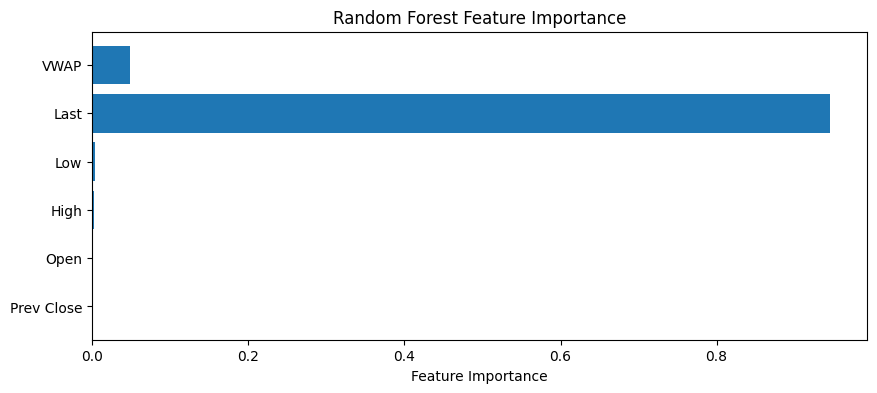

In [78]:
# Visualize feature importance
feature_importance = model_tree.feature_importances_

plt.figure(figsize=(10, 4))
plt.barh(X_train.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

Observation:

* compared to the linear model the feature importance of Last is very significatnt in Random Forest and rest of the features have little to no impact

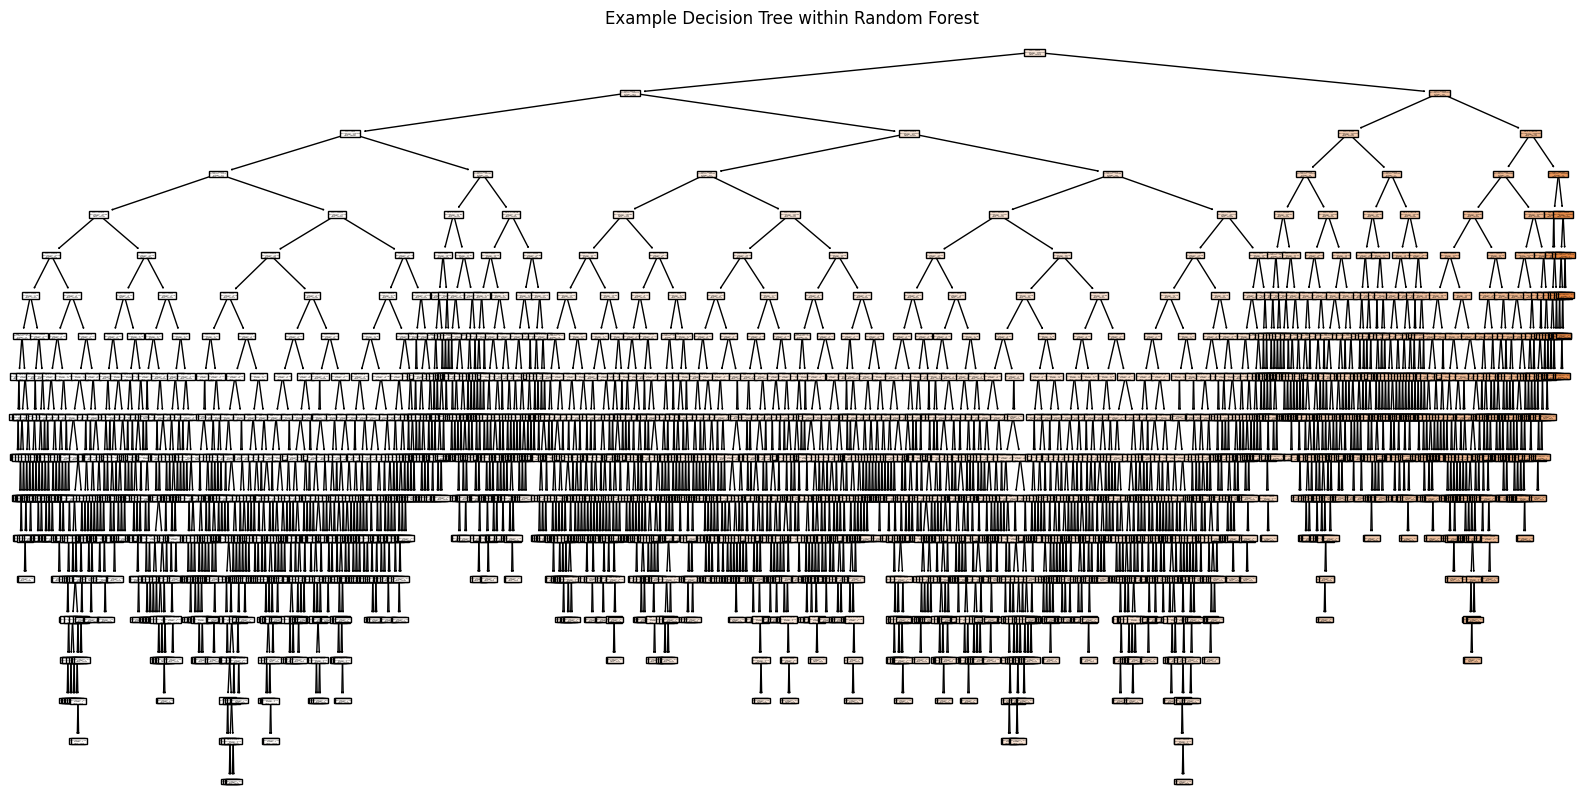

In [80]:
plt.figure(figsize=(20, 10))
plot_tree(model_tree.estimators_[0], filled=True, feature_names=X_train.columns)
plt.title("Example Decision Tree within Random Forest")
plt.show()

Tried to print the first decision tree in random forest model but no conclusion can be drawn from the plot

### AutoML to get the best model using h2o

In [81]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvw8_ovvh
  JVM stdout: /tmp/tmpvw8_ovvh/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvw8_ovvh/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_ocqmny
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [82]:
# Convert your pandas DataFrames (X_train, y_train) to H2OFrame
X_h2o = h2o.H2OFrame(X_train)
y_h2o = h2o.H2OFrame(y_train.to_frame())

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [83]:
# Combine X and y into a single H2OFrame
data_h2o = X_h2o.cbind(y_h2o)

In [84]:
# Identify predictors and response columns
predictors = X_h2o.columns
response = 'Close'

In [85]:
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", max_runtime_secs=600)

In [86]:
# Train the model using AutoML
aml.train(x=predictors, y=response, training_frame=data_h2o)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_1_20231211_150544


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    92                 92                          129040                 10           10           10            21            167           106.826

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 8.020877913066142
RMSE: 2.832115448400037
MAE: 0.6730953011245354
RMSLE: 0.003134885275944359
Mean Residual Deviance: 8.020877913066142

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 27.342860259511614
RMSE: 5.229040089682964
MAE: 1.5239841733665453
RMSLE: 0.006426512382520496
Mean Residual Deviance: 27.342860259511614

Cross-Validation Metrics Summary: 
                        mean        sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     1.51516     0.270054     1.39736       1.40279       1.49667       1.29746       1.9815
mean_residual_deviance  28.1292     28.2349      25.1524       9.81357       12.8482       15.2532       77.5783
mse                     28.1292     28.2349      25.1524       9.81357       12.8482       15.2532       77.5783
r2                      0.999257    0.000704691  0.999324      0.999709      0.999672      0.999553      0.998025
residual_deviance       28.1292     28.2349      25.1524       9.81357       12.8482       15.2532       77.5783
rmse                    4.88914     2.29821      5.01522       3.13266       3.58444       3.90554       8.80786
rmsle                   0.00627317  0.00135859   0.00589131    0.00620646    0.00542786    0.00523469    0.00860552

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-12-11 15:06:57  6.017 sec   0                  191.664          141.911         36734.9
    2023-12-11 15:06:57  6.075 sec   5                  113.432          83.8296         12866.8
    2023-12-11 15:06:57  6.136 sec   10                 67.1469          49.5264         4508.7
    2023-12-11 15:06:57  6.183 sec   15                 39.79            29.2578         1583.25
    2023-12-11 15:06:57  6.243 sec   20                 23.68            17.2925         560.741
    2023-12-11 15:06:58  6.305 sec   25                 14.2342          10.2309         202.613
    2023-12-11 15:06:58  6.343 sec   30                 8.79431          6.07369         77.3398
    2023-12-11 15:06:58  6.382 sec   35                 5.70414          3.66342         32.5372
    2023-12-11 15:06:58  6.434 sec   40                 4.17376          2.30994         17.4202
    2023-12-11 15:06:58  6.472 sec   45                 3.50524          1.55125         12.2867
    2023-12-11 15:06:58  6.510 sec   50                 3.20276          1.12196         10.2577
    2023-12-11 15:06:58  6.544 sec   55                 3.05491          0.900643        9.33245
    2023-12-11 15:06:58  6.580 sec   60                 2.96807          0.791876        8.80942
    2023-12-11 15:06:58  6.620 sec   65                 2.92289          0.745132        8.54328
    2023-12-11 15:06:58  6.649 sec   70                 2.90605          0.719645        8.44514
    2023-12-11 15:06:58  6.682 sec   75                 2.87325          0.702262        8.25555
    2023-12-11 15:06:58  6.730 sec   80                 2.85941          0.694008        8.17624
    2023-12-11 15:06:58  6.757 se

In [87]:
# Get the best model found by AutoML
best_model_h2o = aml.get_best_model()

# SHAP Analysis

In [88]:
# Convert statsmodels model to scikit-learn-like model

# initialize model
sklearn_model = LinearRegression()

# Assign coefficients
sklearn_model.coef_ = model_reg.params

# Assign intercept
sklearn_model.intercept_ = model_reg.params[0]

sklearn_model

LinearRegression()

In [ ]:
# SHAP explainer object for LM
explainer_lr  = shap.KernelExplainer(sklearn_model.predict, preprocessed_X_train)
shap_values_lr = explainer_lr.shap_values(preprocessed_X_test)

  0%|          | 0/665 [00:00<?, ?it/s]

In [ ]:
# Waterfall plot for tree model
shap.waterfall_plot(shap.Explanation(values=shap_values_lr[0], base_values=explainer_lr.expected_value, data=preprocessed_X_test.iloc[0]))

Observations:

* The feature values are represented in the Y axis
* Predicted value for close is 145.011
* The initial prediction is 341.747
* The values in between are the SHAP values where LAst VWAP and Low are negative and High, Open and Prev Close is positive

lets view the Summary and dependency plot to see what make some values negative

In [ ]:
# Bar plot of SHAP values for all features
shap.summary_plot(shap_values_lr, preprocessed_X_test, plot_type="bar")

Observations:

* The features with high Average shap values have made significant contribution in the model (Last, VWAP)
* The values in barplot are the mean of sum(|Shap values|) for each feature

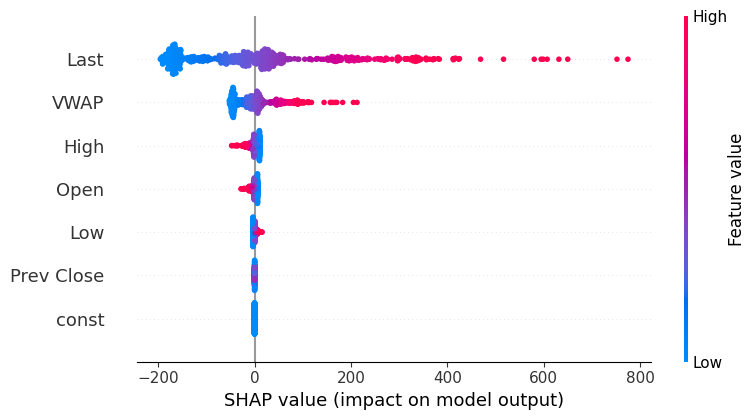

In [ ]:
# Summary plot of SHAP values for all features
shap.summary_plot(shap_values_lr, preprocessed_X_test)

Observations:

* We understand that for low shap values of Last and VWAP the feature values are low as the feature values increases the shap values also increases.
* On the other hand for low shap values of Open and High the feature value is high and with decrease in Feature value the shap value increases.

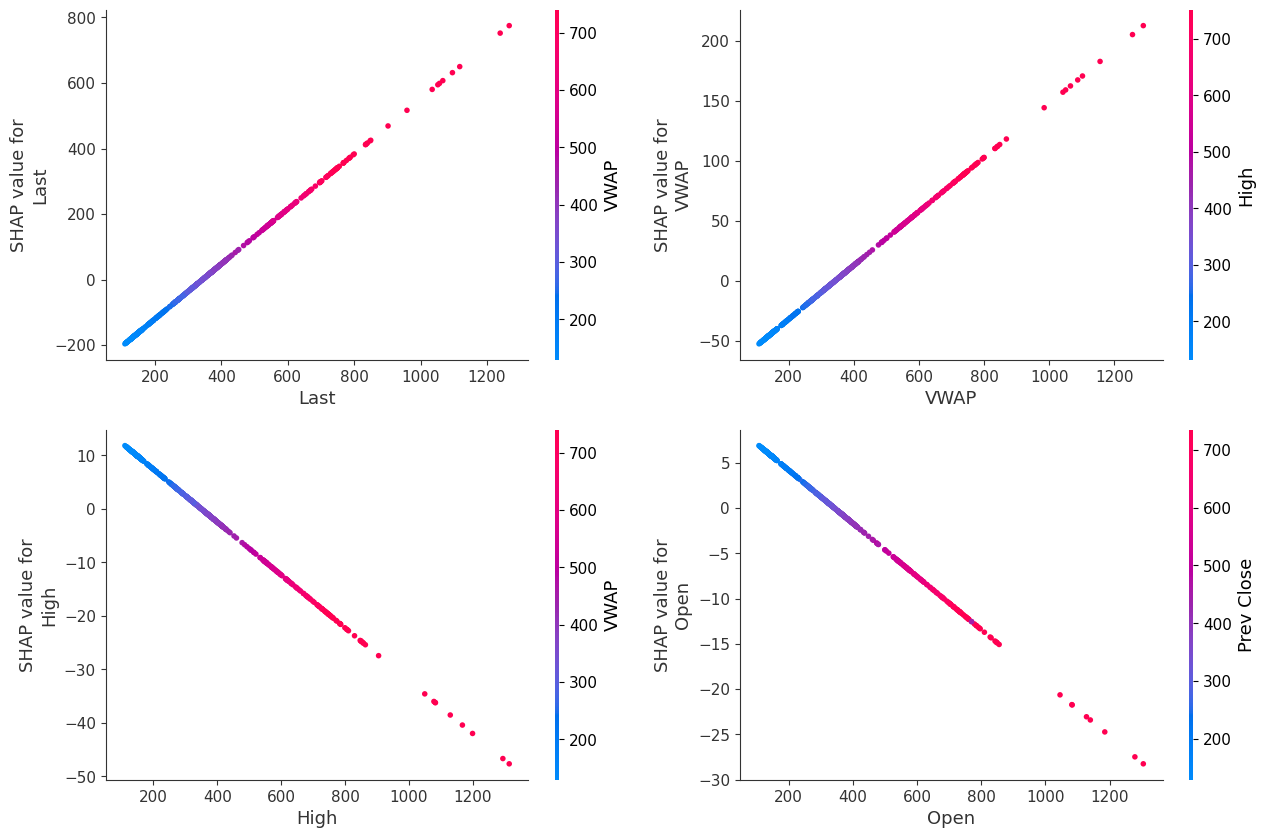

In [ ]:
# Dependence plot for tree model
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

shap.dependence_plot("Last", shap_values_lr, preprocessed_X_test, ax=axes[0,0], show=False)

shap.dependence_plot("VWAP", shap_values_lr, preprocessed_X_test, ax=axes[0,1], show=False)

shap.dependence_plot("High", shap_values_lr, preprocessed_X_test, ax=axes[1,0], show=False)

shap.dependence_plot("Open", shap_values_lr, preprocessed_X_test, ax=axes[1,1], show=False)

plt.show()

Inference:

* From the dependency plot we can understand as the Last and VWAP values increase the SHAP value increases hence there is a direct relation.
* For the High and Open Plot we can understannd that as the values increase the SHAP values Decrease hence there is an inverse relation.